In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [3]:
class AgentState(TypedDict):
    name : str
    numbers : List[int]
    counter : int

In [4]:
def greeting_node(state : AgentState) -> AgentState:
    """Prints a greeting message to user"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0
    return state

def random_node(state : AgentState) -> AgentState:
    """Generates a random number from 1 to 10"""
    state['numbers'].append(random.randint(0, 10))
    state['counter'] += 1
    return state

def decide_next(state : AgentState) -> AgentState:
    """Decides what to do at the next stage"""
    if(state['counter'] < 5):
        print(f"Entering Loop {state['counter']}")
        return "loop"
    else:
        return "exit"

In [5]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)
graph.add_node("random", random_node)
graph.add_edge(START, "greeter")
graph.add_edge("greeter", "random")
graph.add_conditional_edges(
    "random",
    decide_next,
    {
        "loop" : "random",
        "exit" : END
    }
)
app = graph.compile()

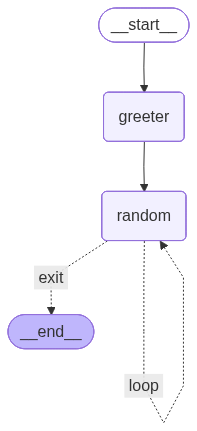

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
initial_state = AgentState({"name" : "Vaibhav", "numbers" : [], "counter" : -1})
response = app.invoke(initial_state)
print(response)

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4
{'name': 'Hi there, Vaibhav', 'numbers': [7, 0, 6, 9, 10], 'counter': 5}


## Exercise

In [38]:
class AgentState1(TypedDict):
    player_name : str
    l : int
    r : int
    random_num : int
    guesses : List[int]
    attempts : int

In [44]:
def setup(state : AgentState1) -> AgentState1:
    state['attempts'] = 0
    state['random_num'] = random.randint(state['l'], state['r'])
    return state

def guess(state : AgentState1)-> AgentState1:
    num = random.randint(state['l'], state['r'])
    state['guesses'].append(num)
    state['attempts'] += 1
    print(f"Guesses till now: {state['guesses']}")
    return state

def hint(state : AgentState1) -> AgentState1:
    if(state['guesses'][-1] == state['random_num']):
        print(f"You have guessed the right number! It was {state['random_num']}")
    elif(state['attempts'] < 7):
        if(state['guesses'][-1] < state['random_num']):
            print("Guess is lower than actual number")
            state['l'] = state['guesses'][-1] + 1
        else:
            print("Guess is higher than actual number")
            state['r'] = state['guesses'][-1] - 1
    else:
        print(f"You failed to guess the number {state['random_num']}")
    return state

def decide_next(state: AgentState1) -> str:
    if state['guesses'][-1] == state['random_num'] or state['attempts'] >= 7:
        return "exit"
    return "loop"

In [45]:
graph = StateGraph(AgentState1)
graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint_node", hint)
graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")
graph.add_conditional_edges(
    "hint_node",
    decide_next,
    {
        "loop" : "guess",
        "exit" : END
    } 
)

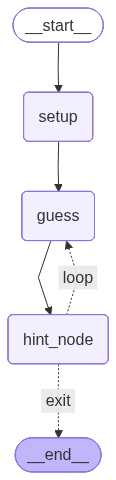

In [46]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [47]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "l": 1, "r": 20})
print(result)

Guesses till now: [10]
Guess is higher than actual number
Guesses till now: [10, 9]
Guess is higher than actual number
Guesses till now: [10, 9, 4]
Guess is lower than actual number
Guesses till now: [10, 9, 4, 5]
Guess is lower than actual number
Guesses till now: [10, 9, 4, 5, 7]
You have guessed the right number! It was 7
{'player_name': 'Student', 'l': 6, 'r': 8, 'random_num': 7, 'guesses': [10, 9, 4, 5, 7], 'attempts': 5}
